In [1]:
import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz

In [2]:
az.style.use('arviz-doc')

# Bayesian Inference
- Central ideas that make a method Bayesian:
  - Every unknown quantity is modeled using a probability distribution
  - Bayes' theorem is used to update this distribution in light of data

## Bayes Theorem

$$p(\theta|Y) = \frac{p(Y|\theta)p(\theta)}{p(Y)}$$ 
where
- $p(\theta|Y)$ is the posterior
- $p(\theta)$ is the prior. Way to introduce prior knowledge to the model
- $p(Y)$ is the marginal likelihood. Also called evidence. It's the likelihood average across all hypothesis ($\theta$ values)
- $p(Y|\theta)$ is the likelihood. Specifies the plausability of the data

- Posterior as the only estimator. For example, to calculate the mean of $\theta$, we use
  - $\bar{\theta} = \int \theta p(\theta|Y)d\theta$
  - It's the weighted average, where each value of $\theta$ is weighted according to the probability assigned by the posterior

## Bayesian Inference
- Problem: Try to determine the degree of which a coin is biased or not

### Defining the prior
- Using the Beta distribution (good for probabilities, defined between 0 and 1)

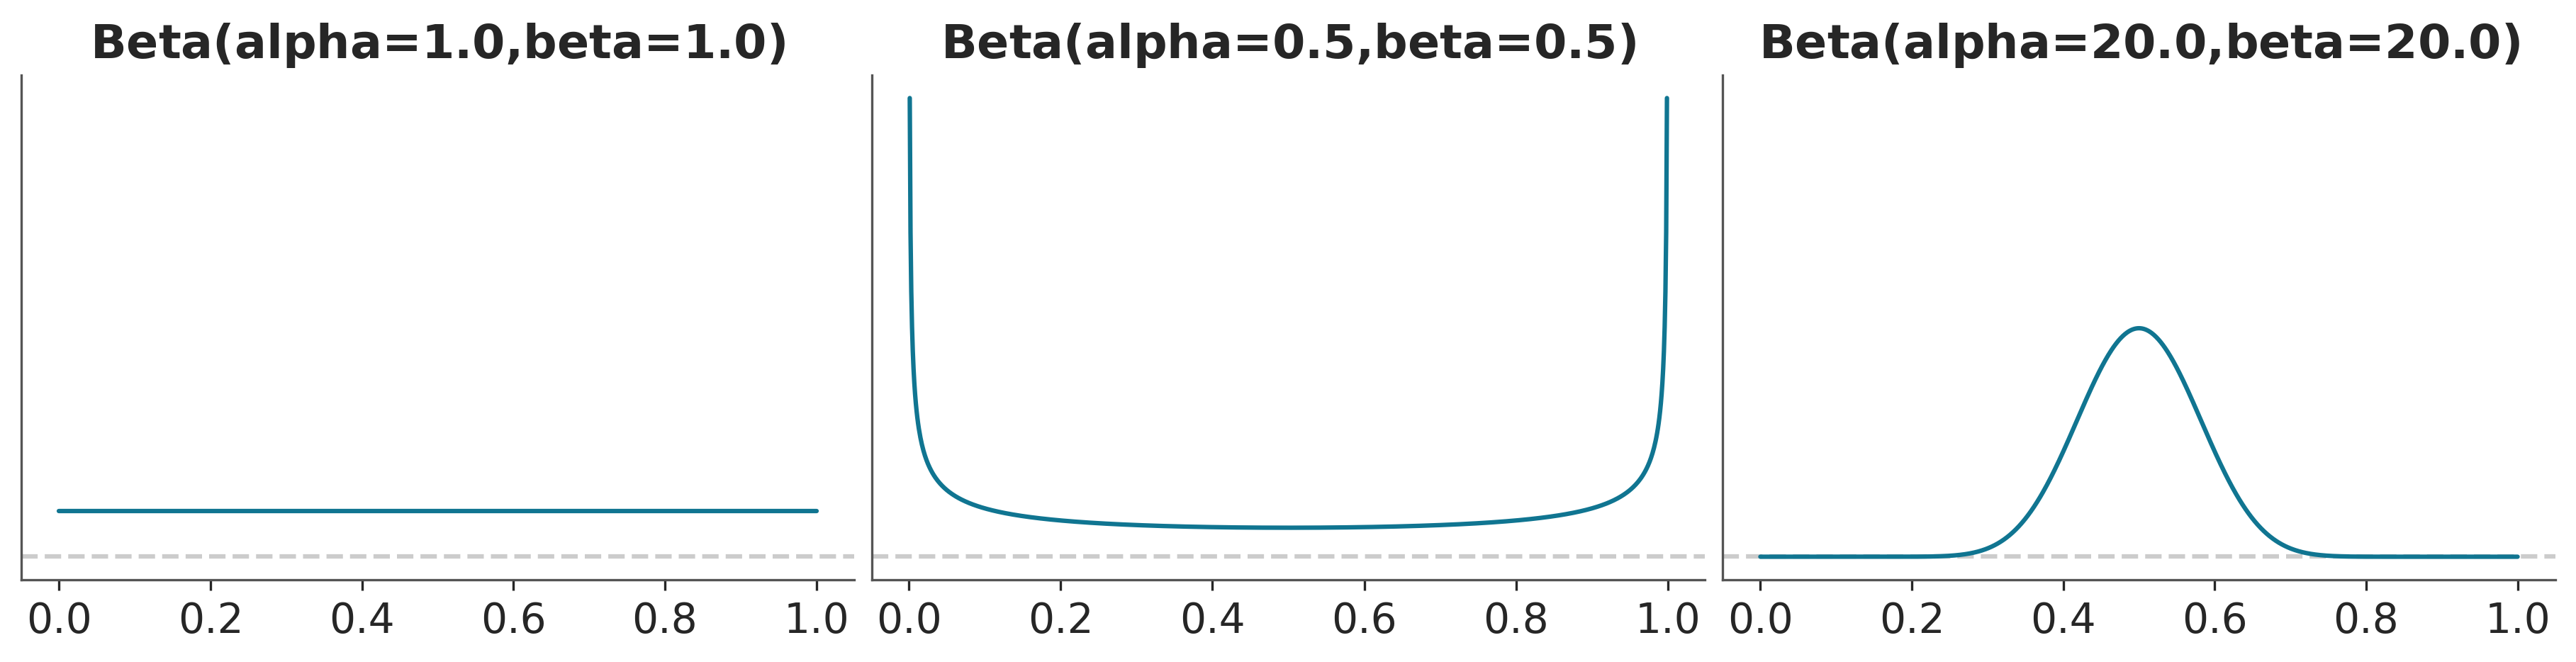

In [3]:
_, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

params = [(1, 1), (0.5, 0.5), (20, 20)]

for (a, b), ax  in zip(params, axes):
    y = pz.Beta(a, b).plot_pdf(ax=ax, legend="title")

In [4]:
pz.Beta().plot_interactive(fixed_lim=(None, None, None, 10))

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

### Likelihood
- As it is a coin toss, the likelihood is given by the binomial

In [5]:
pz.Binomial(1, 0.5).plot_interactive(pointinterval=False, fixed_lim=(None, None, None, 1))

interactive(children=(IntSlider(value=1, description='n (0, inf)', max=11, style=SliderStyle(description_width…

### Posterior

- Using the beta distribution as the prior and the binomial as the likelihood, the posterior can be shown to be a beta distribution (conjugate prior) of the form $$p(\theta|y) \propto Beta(\alpha_{\alpha prior} + y, \beta_{\beta prior} + N - y)$$

### Notation
- $\theta \sim Beta(\alpha,\beta)$
- $Y \sim Bin(n=1,p=\theta)$

### Calculating the posterior

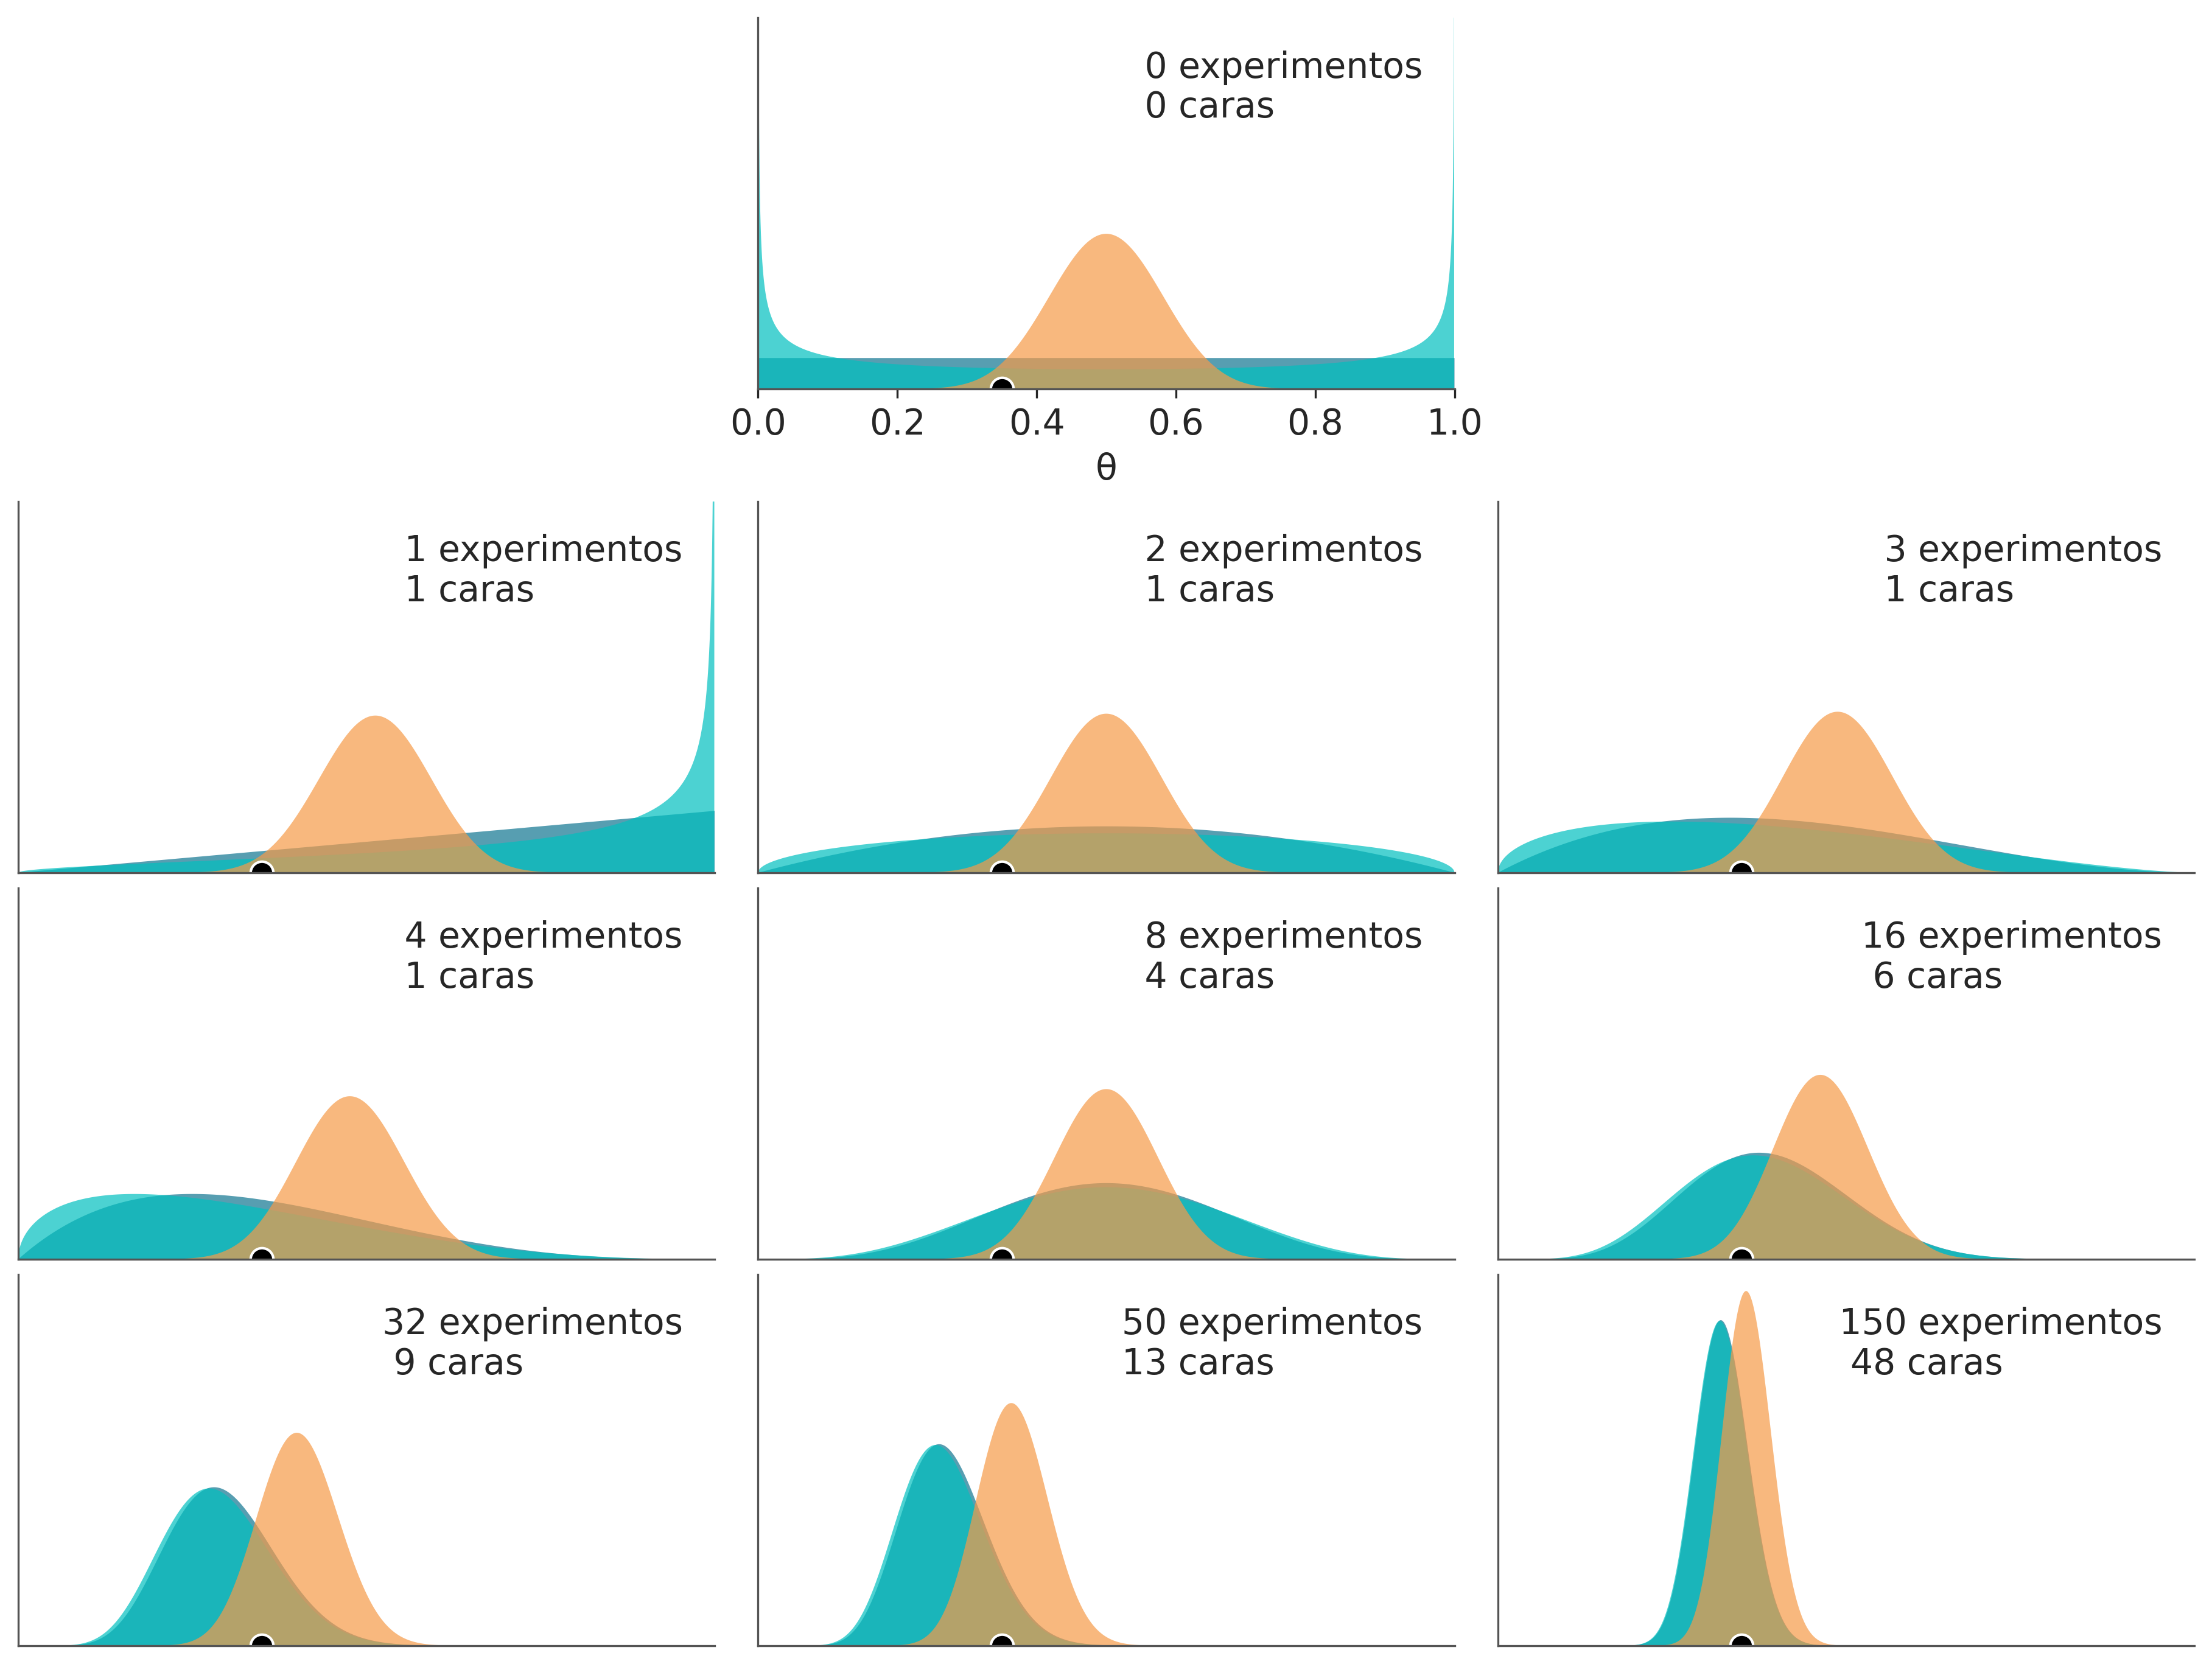

In [6]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = pz.Beta
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
        plt.fill_between(x, 0, posterior, alpha=0.7)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

## Analyzing results
- Results of a Bayesian Analysis is not a single value, but a whole distribution
- The most probable value is given by the peak of the distribution (mode)
- Given a *sufficient* ammount of data, it converges regardless of the prior distribution

### Influence and choice of the a priori
- As data increases, results become less sensitive to the prior
- Non-informative priors
  - Least ammount of information. Generally is not a good choice
- Slightly informative priors
  - Some information about what the parameters can be
    - Range of values
    - If its positive or not
- Informative priors
  - Advantageous when there is little data
- From Bayesian perspective, all models have priors, even when they are not explicit

### Quantifying the weight of the prior
- Beta can be expressed as 
  - $\alpha = \mu \kappa$
  - $\beta = (1 - \mu)\kappa$
- $\kappa$ can be interpreted as the number of yes/no experiments we perform, with average of $\mu$. 
- If we set $\kappa = 40$ and $\mu=0.5$, its like saying
  - 40 trials and 20 where heads

### Summarizing the posterior
- Reporting the mean of a probability distribution
- Credibility interval
  - HDI: **H**ighest Posterior **D**ensity **I**nterval
    - Shortest interval that contains a fixed proportion of the probability density
    - For a unimodal distribution, the 95% is the interval between 2.5% quantile and 97.5% quantile
  - A credibility interval is not the same as a confidence interval
    - Confidence interval: If we repeat the experiment infinite times, the proportion of intervals that contais the true parameter coincides with stipulated confidence level

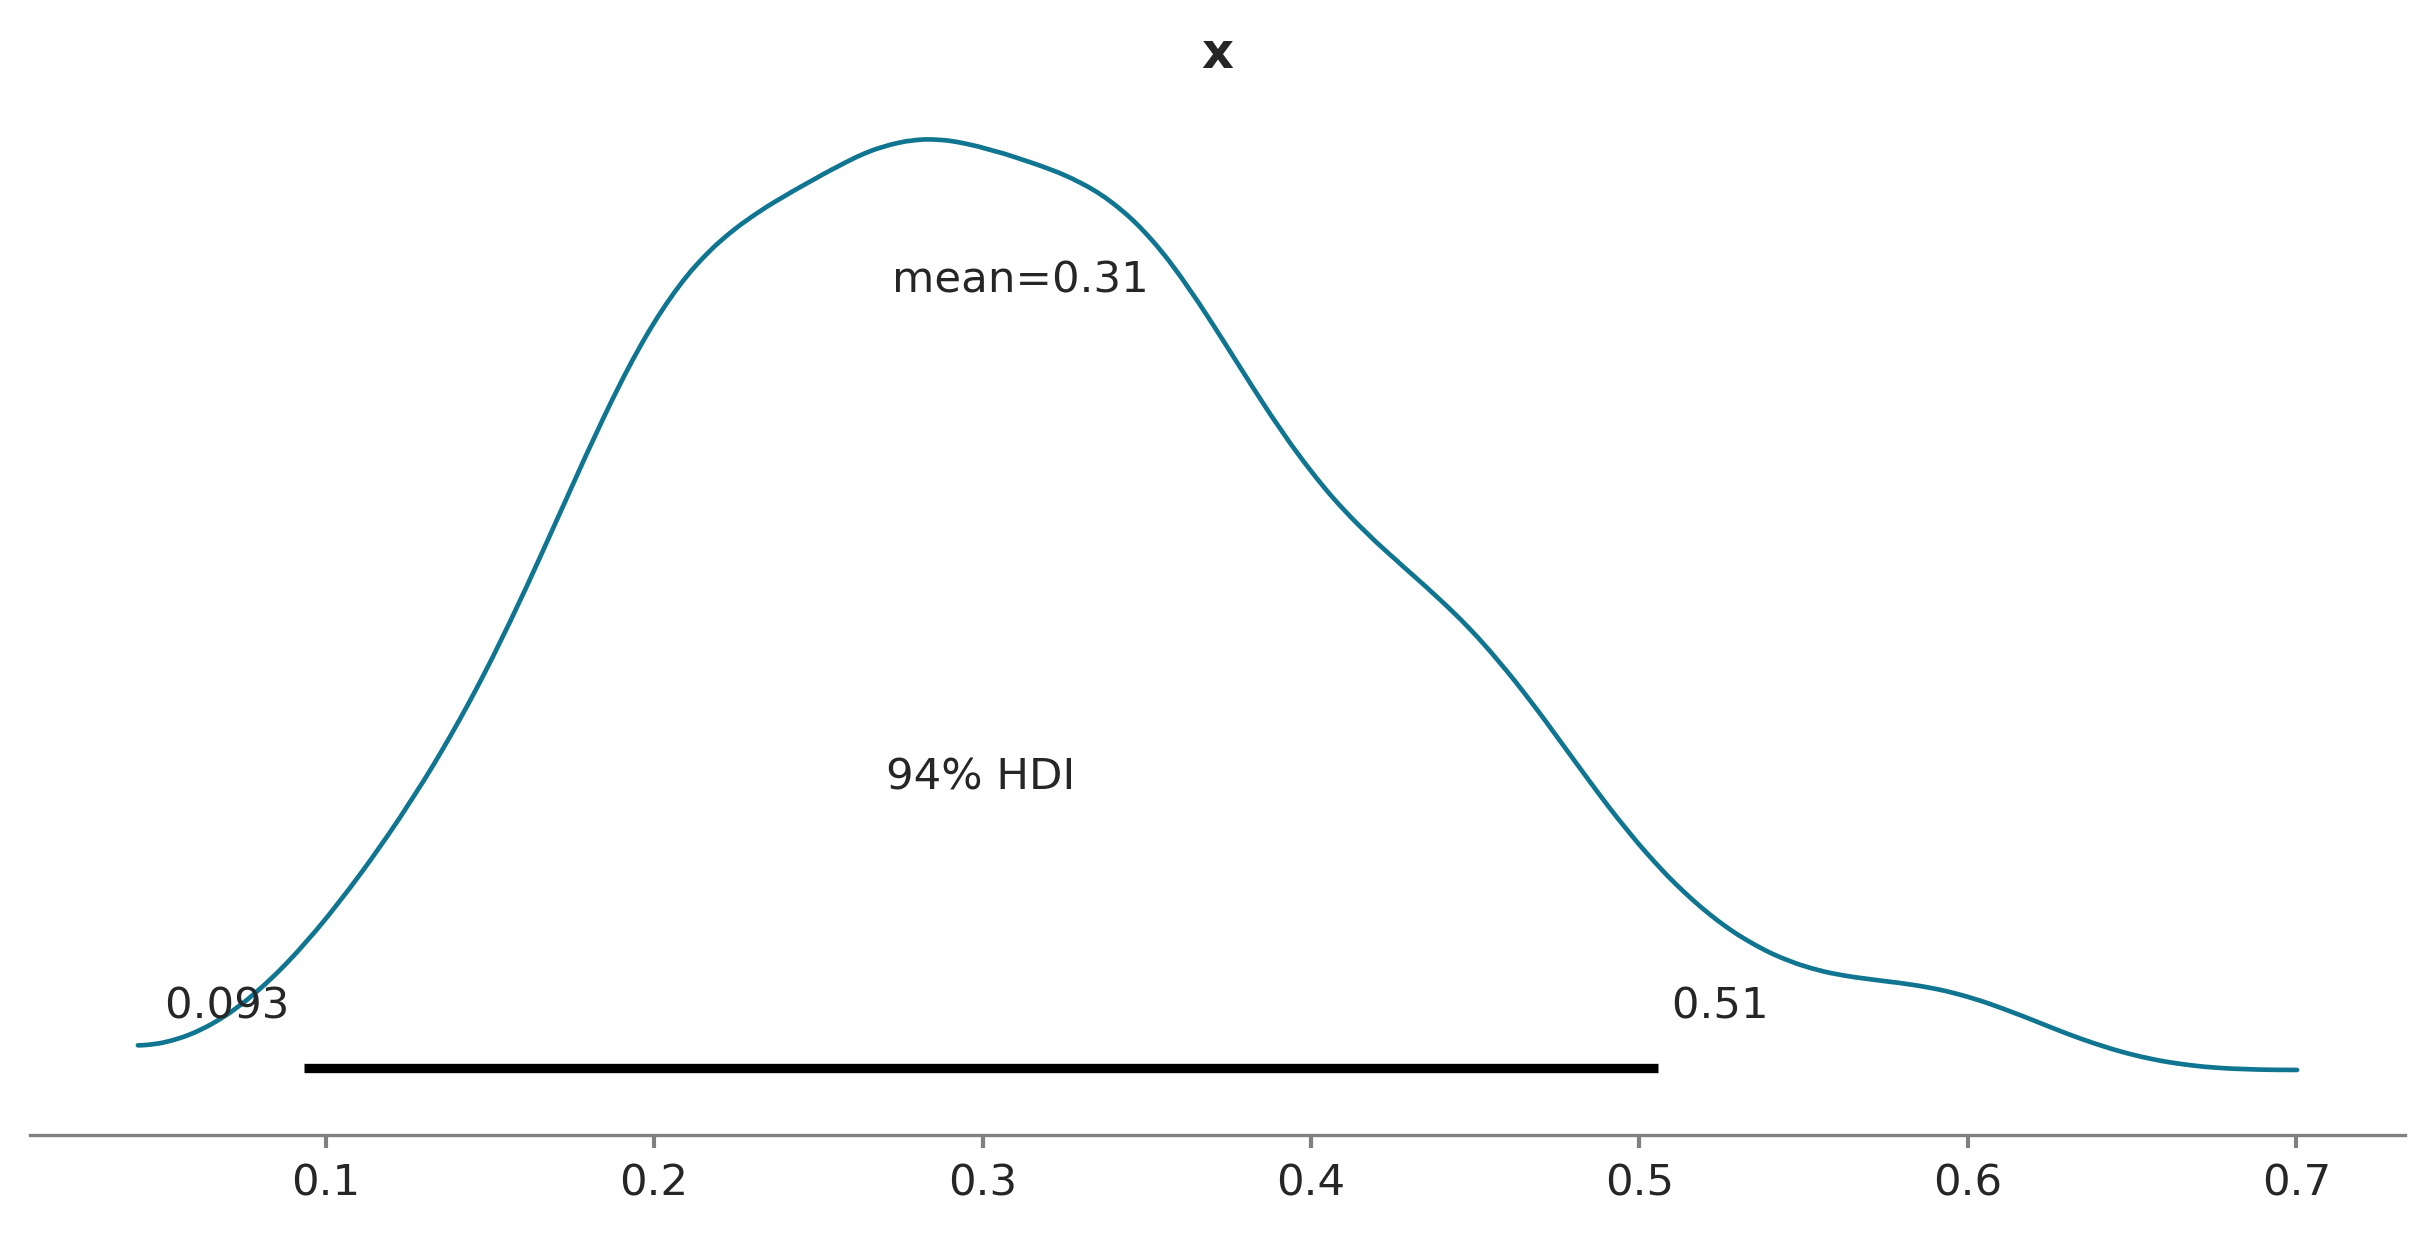

In [7]:
mock_posterior = pz.Beta(5, 11).rvs(size=1000)
az.plot_posterior(mock_posterior, figsize=(8, 4));

## Predictive Distribution

### Posterior predictive distribution
  - The predictions once the posterior has been obtained $$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)d\theta$$
  - We can generate this samples like this
    - Choose a value of $\theta$ from the posterior distribution $p(\theta|y)$
    - Fix $\theta$ in the distribution that we use as likelihood $p(\tilde{y}|\theta)$ and generate a random sample
    - Repeat first step as many times we want

### Prior predictive distribution
- Represents the data $p(Y*)$ that the model expects to see before seeing the data $$p(Y^{*}) = \int_{\Theta} p(Y^{*}|\theta)p(\theta)d\theta$$

### Prior/Predictive distribution for the coin toss

$$p(Y^{*}) \propto \text{Beta-Binomial}(n=N, \alpha_{\alpha prior},\beta_{\beta prior})$$
$$p(\tilde{Y}|Y) \propto \text{Beta-Binomial}(n=N, \alpha_{\alpha prior} + y,\beta_{\beta prior} + N-y)$$

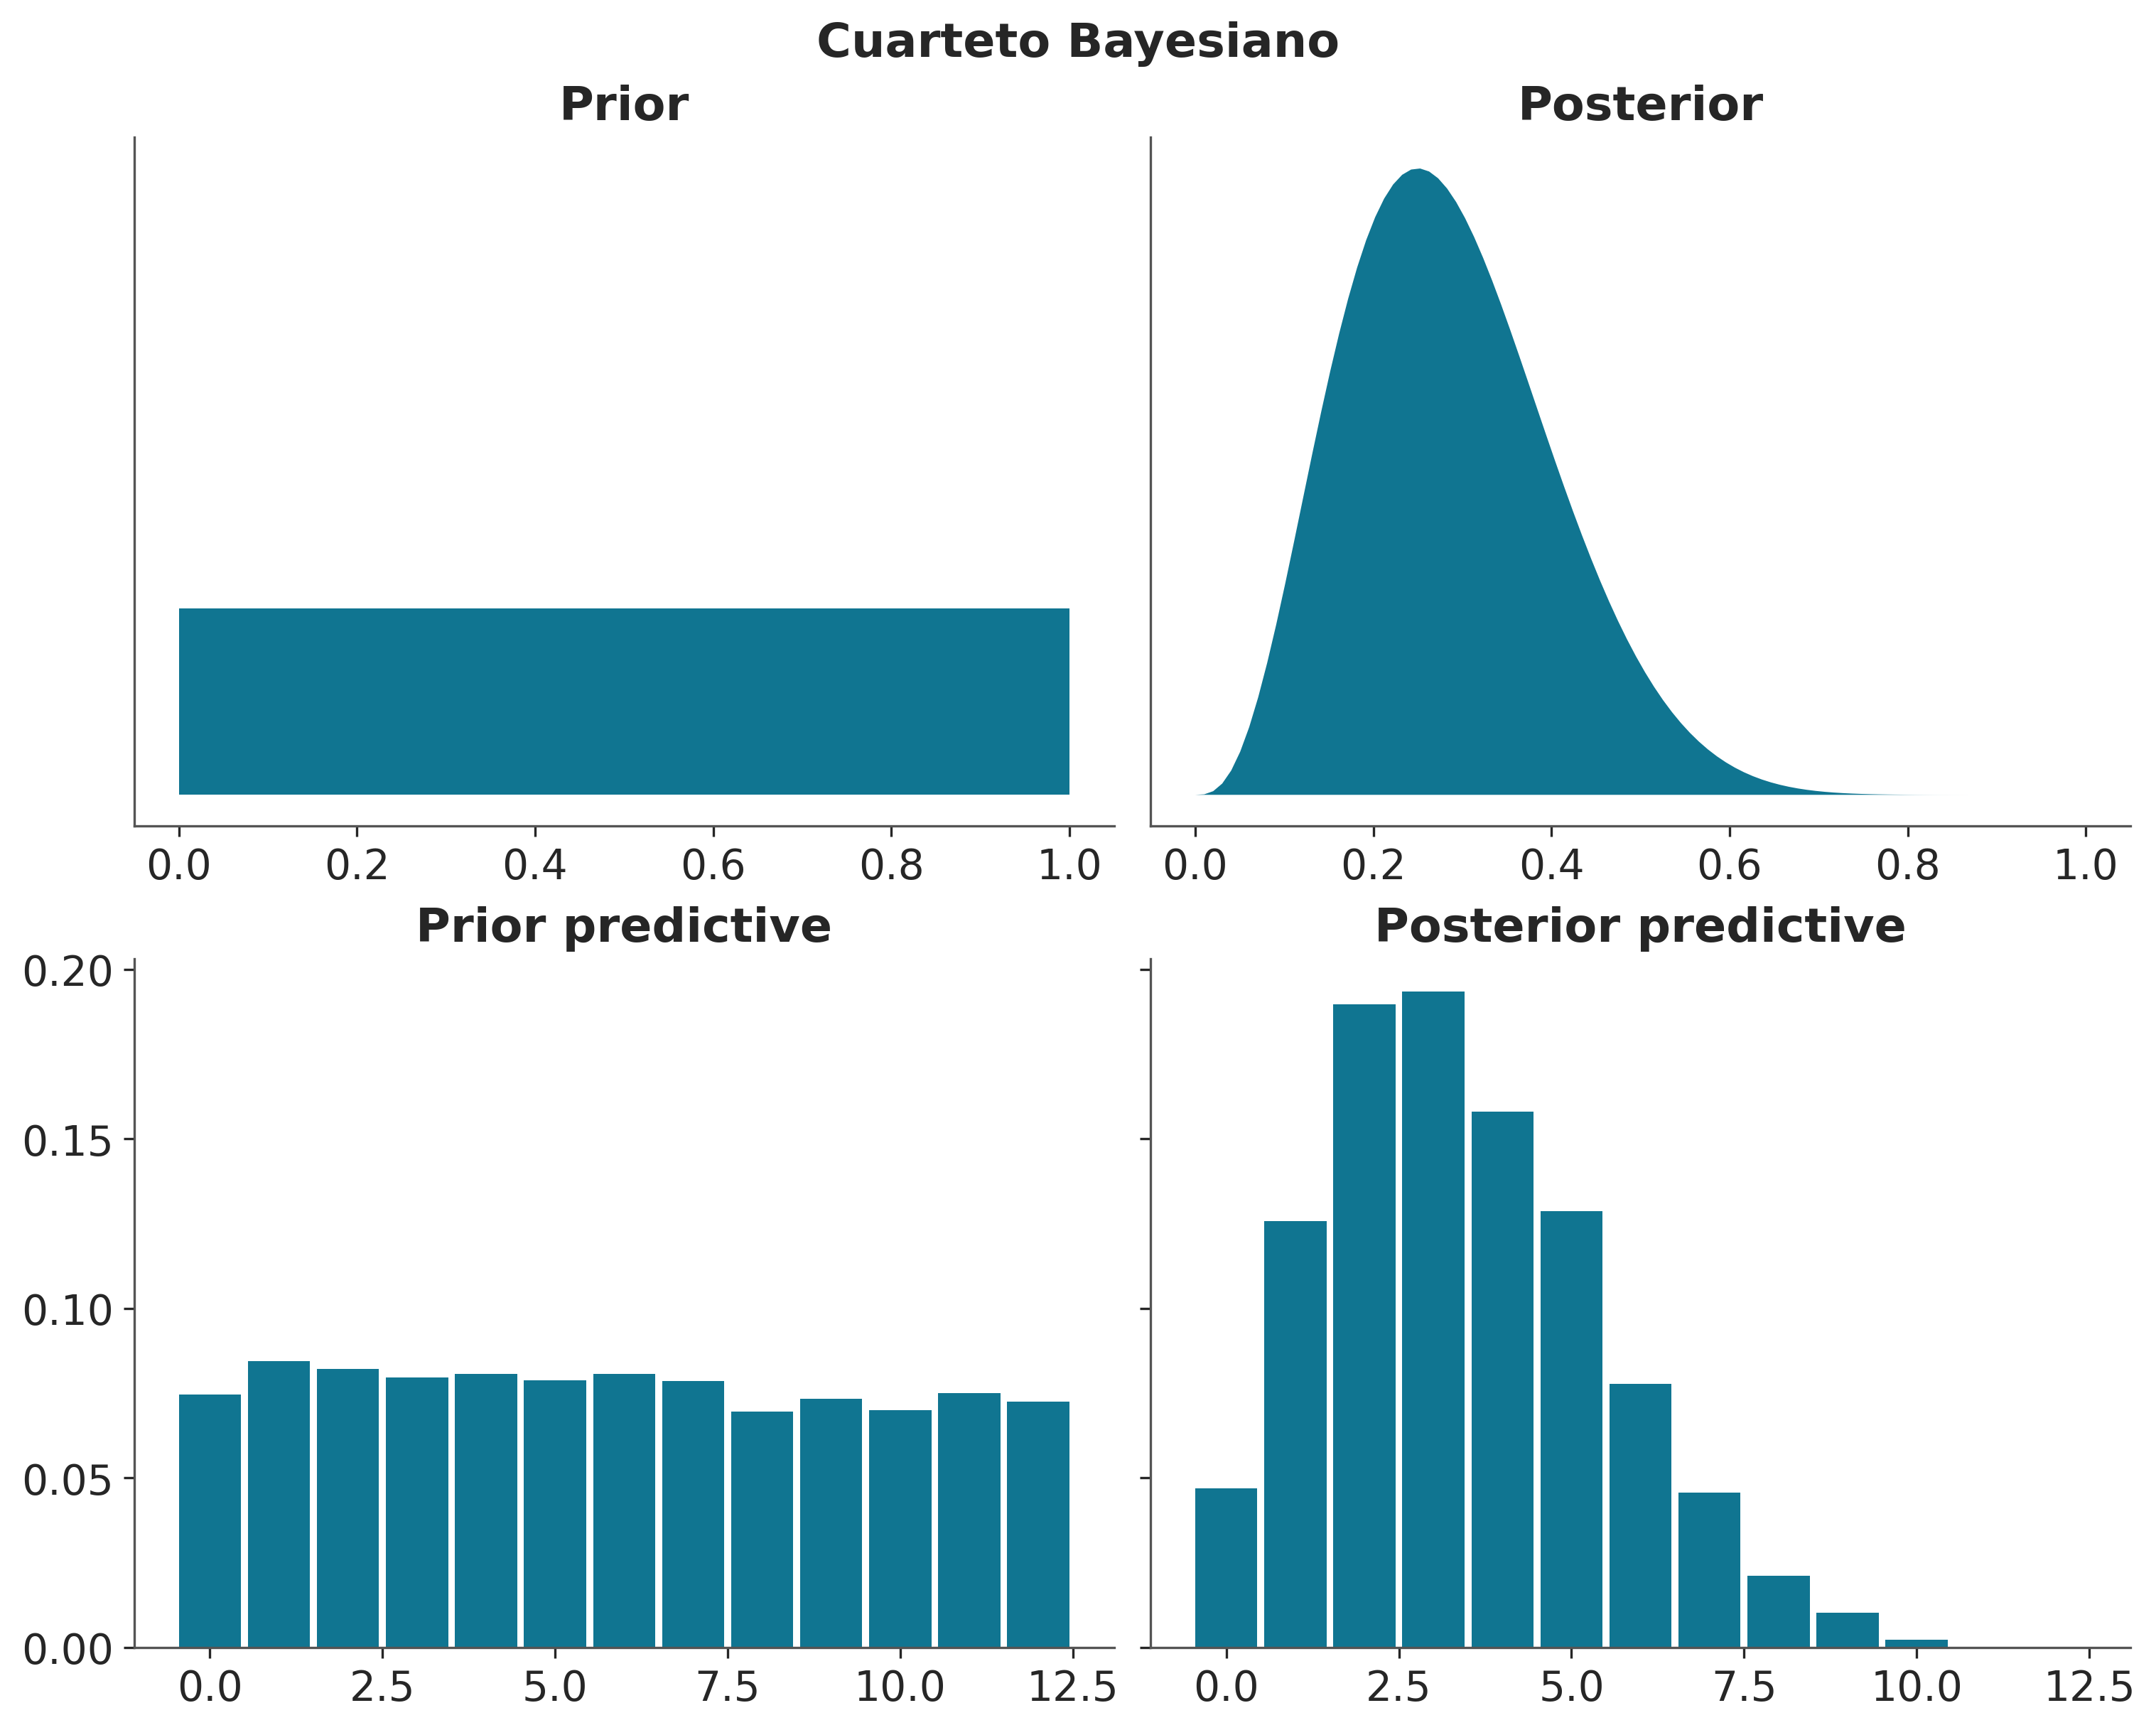

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex="row", sharey="row")
axes = np.ravel(axes)
dist = pz.Beta
a_prior = 1
b_prior = 1
N = 12
y = 3
x = np.linspace(0, 1, 100)


prior = dist(a_prior, b_prior).pdf(x) ## Prior
axes[0].fill_between(x, 0, prior)
axes[0].set_title("Prior")
axes[0].set_yticks([])


posterior = dist(a_prior + y, b_prior + N - y).pdf(x) # Posterior 
axes[1].fill_between(x, 0, posterior)
axes[1].set_title("Posterior")


prior = dist(a_prior, b_prior).rvs(500) ## Gets 500 samples from the prior
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in prior]) 
axes[2].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[2].set_title("Prior predictive")

posterior = dist(a_prior + y, b_prior + N - y).rvs(500) ## Gets 500 samples from the posterior distribution
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in posterior]) # For each posterior p
axes[3].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[3].set_title("Posterior predictive");

fig.suptitle("Cuarteto Bayesiano", fontweight="bold", fontsize=16);